## Demo 1

In [2]:
%matplotlib inline
from igenetic.models import GA
from solution import Solution

### Дано:

<img src="model.png">

$$
    L = 500 cm \\
    l = 100 cm \\
    \delta_{max} = 2.7 cm \\
    \sigma_{max} = 14000 N/cm^2 \\
    E = 2 * 10^7 N/cm^2 \\
    P = 50000 N \\
$$

### Ограничение 1 — минимизация объема

$$V = l(x_1x_2 + x_3x_4 + x_5x_6 + x_7x_8 + x_9x_{10})$$

### Ограничение 2 — отклонение концевого сечения

$$
    \frac{Pl^3}{E}(\frac{244}{x_1x_2^3} + \frac{148}{x_3x_4^3} + \frac{76}{x_5x_6^3} + \frac{28}{x_7x_8^3} + \frac{4}{x_9x_{10}^3}) \leq \delta_{max}
$$

### Ограничение 3 — напряжение при изгибе

$$ 
    \frac{6Pl}{x_9x_{10}^3} \leq \sigma_{max} \\
    \frac{6P(2l)}{x_7x_8^3} \leq \sigma_{max} \\
    \frac{6P(3l)}{x_5x_6^3} \leq \sigma_{max} \\
    \frac{6P(4l)}{x_3x_4^3} \leq \sigma_{max} \\
    \frac{6P(5l)}{x_1x_2^3} \leq \sigma_{max} \\
$$

In [3]:
class SolutionMod1(Solution):
    DELTA = 80
    SIGMA = 14000

    L = 500
    l = 100
    P = 30000
    E = 2 * (10**7)

population_size = 150
generations = 200
elite_size = 10

In [4]:
best, graph_data = GA(SolutionMod1, population_size, generations, elite_size).optimize()

In [5]:
[round(x, 2) for x in best._solution]

[3.06, 59.81, 2.68, 56.64, 2.56, 50.17, 1.49, 53.74, 1.2, 42.4]

In [6]:
best._volume()

59401.11203828753

In [7]:
best._delta()

2.6923437038085787

In [8]:
best._sigmas()

[13931.161742759621,
 13919.341328059378,
 13983.236286829388,
 13984.391750057217,
 13690.095975017904]

In [9]:
import matplotlib.pyplot as plt

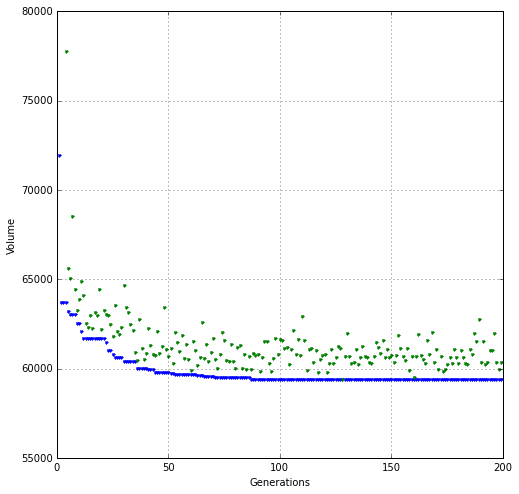

In [10]:
x, best_solutions, mean = zip(*graph_data)
mean_volumes = [1/m for m in mean]
best_volumes = [b._volume() for b in best_solutions]
plt.figure(num=None, figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
plt.ylim([55000, 80000])
plt.ylabel(u'Volume')
plt.xlabel(u'Generations')
plt.grid(True)
plt.plot(x, best_volumes, '.',
         x, mean_volumes, '.')